<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 4</h1>
    <h2>This is a two week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Plot should have axis labels, grid, legend, title, atleast size 10X10 also give proper comments, function name, variable names to your coding, if you didn't follow the instructions there will be a reduction in the points.</b><br><br> 
     <br><br><b> Write sudo-code if you didn't get output or left out of time so that you will be awarded with atmost 50% of marks for that particular session.</b><br><br>
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$13^{th}$ November, Saturday at 18:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [1]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = ''
member2 = 'slatou2s'

# Classification [100 points]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
#Import other libraries here

# Task 1: Linear Discriminants [50 points]
### Read Lecture 5 to implement it

### 1. Create datapoints as follows [10 points]
- The points for the first class are sampled from the Gaussian distribution with the mean1 [0,4], 
- The points for the second class are sampled from the Gaussian distribution with the mean2 [3,3], 
- The covariance matrix $$\begin{bmatrix} 0.3 & 0.2 \\ 0.2 & 0.2 \end{bmatrix}$$ is the same for both distributions. 
- Create 300 sample for each class and visualise them, give different colors for two classes.

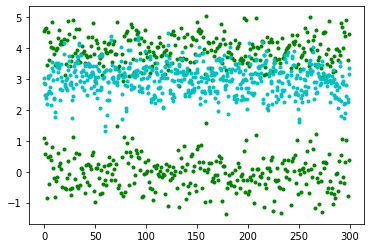

In [3]:
#code here
covariance = np.array([[0.3,0.2],[0.2,0.2]])
point_class1 = np.random.multivariate_normal([0,4],covariance,300)
point_class2 = np.random.multivariate_normal([3,3],covariance,300)

# Show plot
plt.plot(point_class1,'g.')
plt.plot(point_class2,'c.')

### 2. Implement least-square classification method (you should write your own function no libraries except math ones like numpy). Only linear discriminant functions without any generalisation and plot the line separating these two classes, along with the previous plot [20 points]

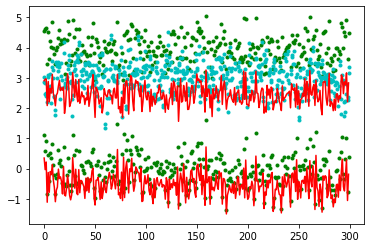

In [4]:
#code here
def leastsquareclass(c1,c2):
    # Y = Wt*X+W0
    #allsamples = np.concatenate((point_class1,point_class2),axis=0)
    target = np.ones((c1.shape[0],1))
    # X' * X
    X = (c1.T).dot(c1)
    # inv( X' * X )
    pseudoinv_data = np.linalg.pinv(X)    
    # inv( X' * X ) * X'
    xx = (pseudoinv_data.dot(c1.T))    
    # inv( X' * X ) * X' * T
    w = xx.dot(c2)
    return w


w = leastsquareclass(point_class1,point_class2)

y = (w[1]) * (point_class1) + w[0]
# Show plot
plt.figure()
plt.plot(point_class1,'g.')
plt.plot(point_class2,'c.')
plt.plot(y,'r-')
plt.show()

### 3. Plot the outlier variations [20 points]

#### 3.1 Plot-1 [10 points]
- Add outliers (only to one class), namely too correct data points. Visualise how your decision boundary will be changed towards one class where the points are being added. **(look at first slide of Problems with Least Squares in lecture-5)**
- Plot the changed decision boundary along with the plot from step-2 show color differentiation for new boundary, old boundary, classes (outlier should have same color as the class).


In [5]:
#code here
# Show plot

#### 3.2 Plot-2 [10 points]
- Add outliers (both the classes, in the decision region), namely misclassified data points. Show that your decision boundary is sensitive to outliers. **(look at second slide of Problems with Least Squares in lecture-5)**

- Plot the changed decision boundary along with the plot from step-2 (dont merge with the plot in step 3.1) show color differentiation for new boundary, old boundary, classes (outlier should have same color as the class).

In [6]:
#code here
# Show plot

# Task 2: Logistic Regression [50 points]
### Read Lecture 6 to implement it

### 1. Implement logistic regression from scratch, only with numpy library [30 points]
- Use diagnosis.csv dataset to build and validate it. Have "diagnosis" column / dimension as a label.
- Split train and test as 75-25% (no validation is required). Should not change the splitting percentage.
- should achieve accuracy more or equal to 95% (do necessary preprocessing if required)
- Give heat map for confusion matrix and classification report (As in second assignment)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('diagnosis.csv')
data = (data.dropna(how='all',axis=1)).drop('id',axis=1)
data['diagnosis'] = data['diagnosis'].replace('M',0)
data['diagnosis'] = data['diagnosis'].replace('B',1)
nbtrain = round(data.shape[0]*0.75)
nbtest = (data.shape[0]-nbtrain)
# split 75 - 25 %
data = ((data))
train =data[:nbtrain]
test = data[:nbtest]
x_train,y_train = np.array(train.drop('diagnosis',axis=1)),np.array([train['diagnosis']])
x_test,y_test = np.array(test.drop('diagnosis',axis=1)),np.array([test['diagnosis']])
#x_test,y_test = np.array([test['radius_mean']]),np.array(test['diagnosis'])
#print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1
  0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1
  0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
score :  42 %


C:\Users\latou\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


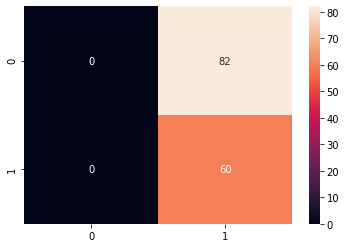

In [8]:
def predict(data,weights):
    #code here
    y = np.dot((weights),(data.T))
    activation = np.vectorize(sigmoid)
    return np.array(activation(y))

def logistic_regression(xtrain,ytrain,nbepoch):
    #code here
    w = np.array( np.ones((1,xtrain.shape[1])) )
    for i in range(nbepoch):
        ypred = predict(xtrain,w)
        #gradient
        diff = ypred-ytrain
        w = w - (1/(ytrain.shape[1])*np.dot(diff,xtrain))
    return w

def sigmoid(x):
    return (1/(1+np.exp(-x)))

def computescore(y,ypred):
    correct = 0
    for i in range(len(y)):
        if y[i] == ypred[i]:
            correct +=1
    return (correct/float(len(y)) *100.0)
#Common Mistake:
#You should have "predict" separately as the existing libraries have
#otherwise it calculates the weight again for the test data
#think how to make it handy

nbepochs = 10
weights = logistic_regression(x_train,y_train,nbepochs)
#print(weights.shape)
pred = predict(x_test,weights)
#
print(y_test)
print(pred)
score = computescore(y_test[0],pred[0])
print('score : ',round(score),'%')
cm = confusion_matrix(y_test[0],pred[0])
# heat map for confusion matrix and classification report 
sns.heatmap(cm, annot=True)


### 2. Compare your implementation with the existing logistic regression algorithm given in python [10 points]

- Use the same training and testing data that you provided for the own implementation
- You should get a similar accuracy $\pm 2$ to your own implementation (someitmes less than your implementation).
- Give heat map for confusion matrix and classification report (As in second assignment)

In [9]:
#code here
model = LogisticRegression()
print(x_train.shape,y_train.shape)
model.fit(x_train,y_train)

pred = model.predict(x_test)
score = model.score(x_test,y_test.T)

print('score : ',round(score*100),'%')
#print(y_test.reshape(142,1),pred.shape)
cm = confusion_matrix(y_test.T,pred.T)

# heat map for confusion matrix and classification report 
sns.heatmap(cm, annot=True)


(427, 30) (1, 427)


ValueError: bad input shape (1, 427)

### 3. Apply your own implementation to the other given data sets: [10 points]
#### 3.1. purchased.csv (dimension 'purchased' includes labels) [5 points]
- Split train and test as 75-25% (no validation is required). Should not change the splitting percentage.
- should achieve accuracy 89-92% (do necessary preprocessing if required)
- Give heat map for confusion matrix and classification report (As in second assignment)



In [ ]:
# Extract data
data = pd.read_csv('purchased.csv')
data = (data.dropna(how='all',axis=1)).drop('User ID',axis=1)
data['Gender'] = data['Gender'].replace('Male',0)
data['Gender'] = data['Gender'].replace('Female',1)
nbtrain = round(data.shape[0]*0.75)
nbtest = (data.shape[0]-nbtrain)
# split 75 - 25 %
data = ((data))
train =data[:nbtrain]
test = data[:nbtest]
x_train,y_train = np.array(train.drop('Purchased',axis=1)),np.array([train['Purchased']])
x_test,y_test = np.array(test.drop('Purchased',axis=1)),np.array([test['Purchased']])
#x_test,y_test = np.array([test['radius_mean']]),np.array(test['diagnosis'])
#print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

# Do preprocessing if required
# call logistic regression
# Display the result

nbepochs = 10
weights = logistic_regression(x_train,y_train,nbepochs)
#print(weights)
pred = predict(x_test,weights)
#
print(y_test)
print(pred)
score = computescore(y_test[0],pred[0])
print('score : ',round(score),'%')
cm = confusion_matrix(y_test[0],pred[0])
# heat map for confusion matrix and classification report 
sns.heatmap(cm, annot=True)


#### 3.2. advertising.csv (dimension 'Clicked on Ad' includes labels) [5 points]
- Split train and test as 75-25% (no validation is required). Should not change the splitting percentage.
- should achieve accuracy more or equal to 95% (do necessary preprocessing if required)
- Give heat map for confusion matrix and classification report (As in second assignment)

In [ ]:
# Extract data
# Do preprocessing if required
# call logistic regression
# Display the result